In [77]:
import pandas as pd
import cbsodata
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tables = cbsodata.get_table_list()

In [3]:
data = '70895ned'

In [4]:
data = cbsodata.get_data(data)

In [5]:
data = pd.DataFrame(data)

In [189]:
dflist = data.values.tolist()

In [190]:
newdflist = []
for i in dflist:
    if len(i[3])<11:
        pass
    else:
        try:
            if int(i[3][10:12])<10:
                weeknr = '0'+i[3][10:11]
            else:
                weeknr = i[3][10:12]
            i[3] = i[3][0:4]+weeknr
            i.append( int(i[3][0:4]))
            i.append(int(weeknr))
            newdflist.append(i)
        except:
            pass

In [191]:
df = pd.DataFrame(data=newdflist,columns = columns)

In [193]:
newdf = df[df.Overledenen_1 != np.nan][df.Geslacht == 'Totaal mannen en vrouwen'][df.LeeftijdOp31December == 'Totaal leeftijd']

<ipython-input-193-6b610731b49b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  newdf = df[df.Overledenen_1 != np.nan][df.Geslacht == 'Totaal mannen en vrouwen'][df.LeeftijdOp31December == 'Totaal leeftijd']


 2020


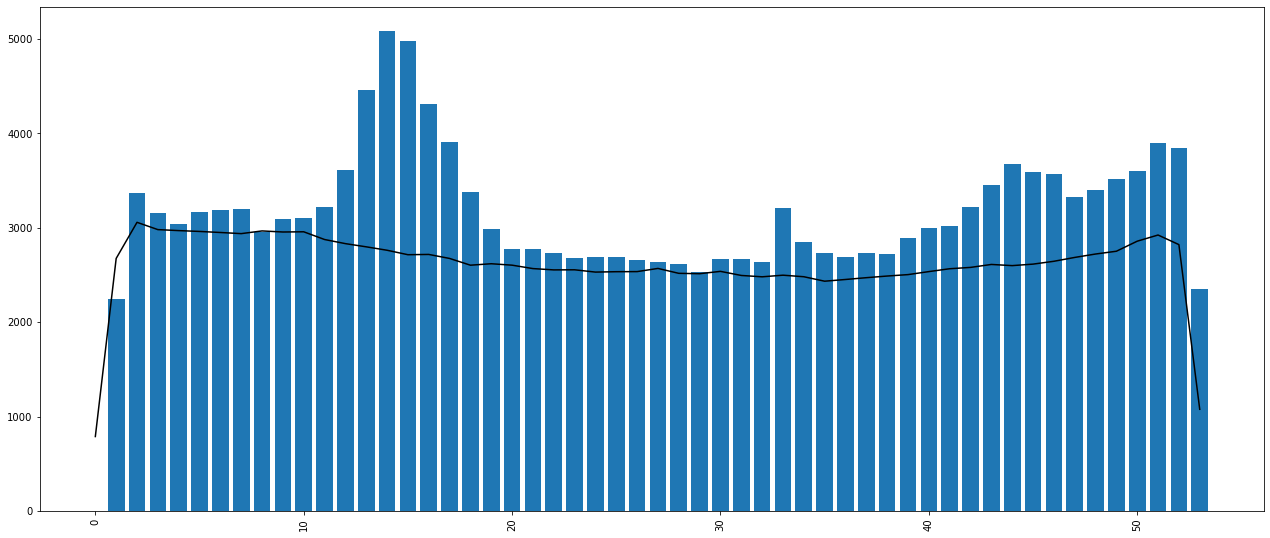

In [228]:
jaaromtevergelijken = int(input())
dfcorona = newdf[newdf.jaar ==jaaromtevergelijken]
dfavg = newdf[newdf.jaar <jaaromtevergelijken][['week','Overledenen_1']]
grouped_df = dfavg.groupby('week')
mean_df = grouped_df.mean()
mean_df = mean_df.reset_index()
fig = plt.figure(figsize=(17,7))
ax = fig.add_axes([0,0,1,1])
langs = dfcorona['week'].values.tolist()
students = dfcorona['Overledenen_1'].values.tolist()
ax.bar(langs,students)
plt.xticks(rotation=90)
plt.plot(mean_df['week'].values.tolist(),mean_df['Overledenen_1'].values.tolist(), color='black')

plt.show()